### Tei3 - pandas - Michael Bieri

https://www.kaggle.com/datasets/shuvokumarbasak4004/global-energy-statistics?resource=download
This dataset provides comprehensive statistics on global energy production, consumption, and related metrics. It includes data on renewable energy, fossil fuels, electricity generation, and more. The data is collected from various reliable sources and is regularly updated to provide accurate insights into the global energy landscape.
Source: Kaggle

In [137]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

1. Import and overview over the dataset:

In [138]:
import pandas as pd

df = pd.read_csv('Global Energy Statistics.csv')
df
# Overview
#print('Info will be shown of the data:')

#print(df.info())
#print('Description will be shown of the data:')
#df.describe()
#statistics = df['Energy Consumption  (BTU)'].describe()
#print(statistics)

,Country,Energy Consumption (BTU),World Share,Per capita Yearly BTU
0,China,"138,689,472,800,000",23.80%,"98,342"
1,United States,"97,661,161,460,000",16.80%,"296,130"
2,Russia,"32,832,743,720,000",5.60%,"225,728"
3,India,"30,476,788,610,000",5.20%,"22,505"
4,Japan,"19,402,928,820,000",3.30%,"153,186"
...,...,...,...,...
204,Saint Pierre & Miquelon,"1,982,000,000",0.00%,"332,718"
205,Tonga,"1,807,000,000",0.00%,"17,142"
206,Cook Islands,"1,677,278,000",0.00%,"96,423"
207,Falkland Islands,"82,900,000",0.00%,"23,041"


2. Edit the dataset and statistic analysation

In [139]:
# Show missing values
print(df.isnull().sum())

# Delete missing values
df.dropna(inplace=True)

# Delete ,
df = df.replace({',': ''}, regex=True)

Country                      0
Energy Consumption  (BTU)    0
World Share                  0
Per capita Yearly BTU        0
dtype: int64


In the dataset are no field without a value. This unit is standard in the energ business.

Convert of the BTU uni(Unit for energy in USA) into kWh.
1 kWh = 3.412 BTU. Die Zahlen sollen umgerechnet werden in einer neuen Zeile dargestellt.

In [141]:
print("Spaltennamen im DataFrame:", df.columns)

# Cleaning
df.columns = df.columns.str.strip()
print("Bereinigte Spaltennamen:", df.columns)

# Delete numerical values
df['Energy Consumption  (BTU)'] = df['Energy Consumption  (BTU)'].astype(float)
df = df.replace({',': '', '%': ''}, regex=True)
df['World Share'] = df['World Share'].astype(float)
df['Per capita Yearly BTU'] = df['Per capita Yearly BTU'].astype(float)

# position world share
position = df.columns.get_loc('World Share')

# BTU in kwh for interest
copyvalues = df['Energy Consumption  (BTU)'] / 3.412

if 'Energy Consumption (kWh)' in df.columns:
    df.drop(columns=['Energy Consumption (kWh)'], inplace=True)

# input new line
df.insert(position, 'Energy Consumption (kWh)', copyvalues)

print(df)

Spaltennamen im DataFrame: Index(['Country', 'Energy Consumption  (BTU)', 'Energy Consumption (kWh)',
       'World Share', 'Per capita Yearly BTU'],
      dtype='object')
Bereinigte Spaltennamen: Index(['Country', 'Energy Consumption  (BTU)', 'Energy Consumption (kWh)',
       'World Share', 'Per capita Yearly BTU'],
      dtype='object')
                     Country  Energy Consumption  (BTU)  World Share  \
0                      China               1.386895e+14         23.8   
1              United States               9.766116e+13         16.8   
2                     Russia               3.283274e+13          5.6   
3                      India               3.047679e+13          5.2   
4                      Japan               1.940293e+13          3.3   
..                       ...                        ...          ...   
204  Saint Pierre & Miquelon               1.982000e+09          0.0   
205                    Tonga               1.807000e+09          0.0   
206       

Groups and analyze the dataset:
1. How many total energy are using the biggest industralised countries in the world?
2. Sort all countries: World share from high to low
3. Pie - which compare the Per capita Yearly BTU of the industry countries?
4. Plot - which compare the world share and the per capita Yearlz BTU

Solution 1:
           Country  Energy Consumption  (BTU)  World Share  \
0            China               1.386895e+14        23.80   
1    United States               9.766116e+13        16.80   
4            Japan               1.940293e+13         3.30   
5           Canada               1.506212e+13         2.60   
6          Germany               1.406254e+13         2.40   
7      South Korea               1.265909e+13         2.20   
11          France               1.024166e+13         1.80   
12  United Kingdom               8.190850e+12         1.41   
15           Italy               6.771608e+12         1.16   

    Energy Consumption (kWh)  Per capita Yearly BTU  
0               4.064756e+13                98342.0  
1               2.862285e+13               296130.0  
4               5.686673e+12               153186.0  
5               4.414456e+12               412047.0  
6               4.121495e+12               170198.0  
7               3.710166e+12               

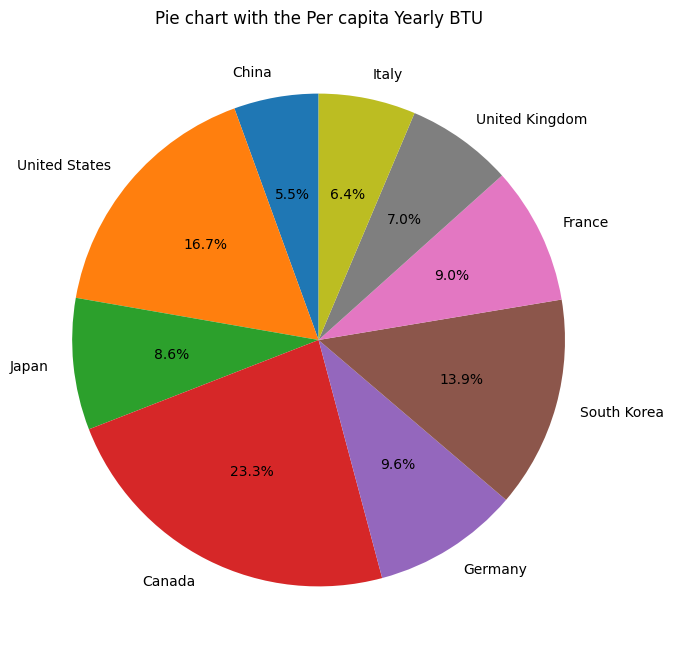

Which country have the biggest Per capita Yearly BTU value?
Country                               Gibraltar
Energy Consumption  (BTU)        192833000000.0
World Share                                0.03
Energy Consumption (kWh)     56516119577.960144
Per capita Yearly BTU                 5914760.0
Name: 105, dtype: object


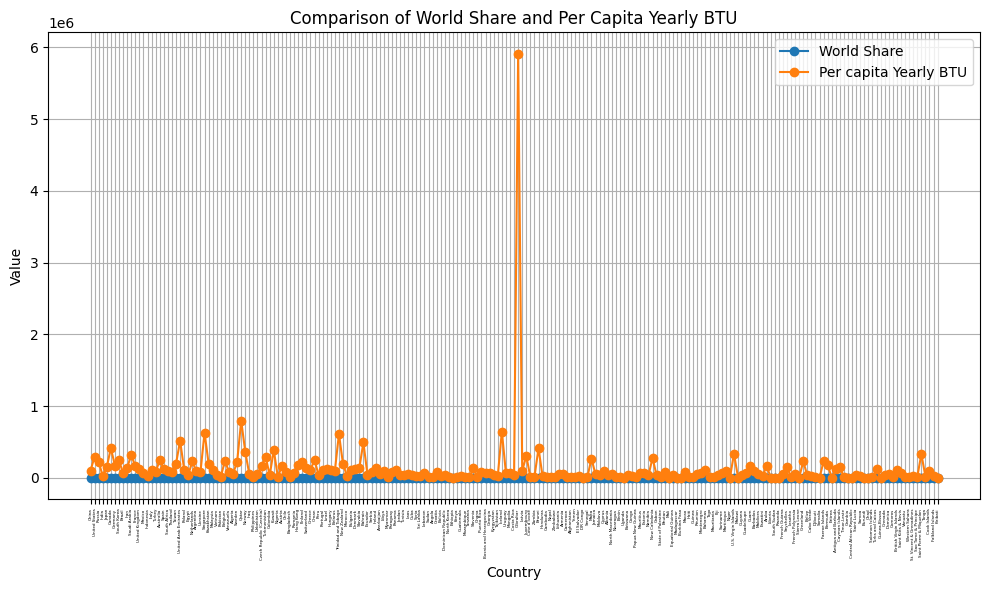

In [142]:
import matplotlib.pyplot as plt

# Solution 1
selected_countries = ['China','United States', 'Germany', 'Japan', 'France', 'United Kingdom', 'Canada', 'South Korea', 'Italy']
industry_df = df[df['Country'].isin(selected_countries)]
print("Solution 1:")
print(industry_df)

# Solution 2 - the full table
World_Share_df = df.sort_values(by="World Share", ascending=False)
print("Solution 2:")
print(World_Share_df)

# Solution 3 Which of the industry the industry countries have the best people?
total_energy_consumption_industry = industry_df['Energy Consumption  (BTU)'].sum()
total_world_share_industry = industry_df['World Share'].sum()
print("Solution 1 - Die Totale Energie der Industrielaender betraegt:")
print(total_energy_consumption_industry)
print("Solution 2 - Die Industrielaender verbrauchen soviele Prozent der gesamten Energie in Prozent:")
print(total_world_share_industry)
print("A pie-chart of the industry countries:")
industry_df.set_index('Country', inplace=True)
plt.figure(figsize=(8, 8))
industry_df['Per capita Yearly BTU'].plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie chart with the Per capita Yearly BTU')
plt.ylabel('')
print("Solution 3:")
plt.show()

#  Solution 4
max_per_capita_yearly_btu_index = df['Per capita Yearly BTU'].idxmax()
max_per_capita_yearly_btu_row = df.loc[max_per_capita_yearly_btu_index]
print("Which country have the biggest Per capita Yearly BTU value?")
print(max_per_capita_yearly_btu_row)

plt.figure(figsize=(10, 6))

plt.plot(df['Country'], df['World Share'], marker='o', label='World Share')
plt.plot(df['Country'], df['Per capita Yearly BTU'], marker='o', label='Per capita Yearly BTU')

plt.title('Comparison of World Share and Per Capita Yearly BTU')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=90, fontsize=3)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

The pie show that the people in china use less energy and the people in canada a lot.

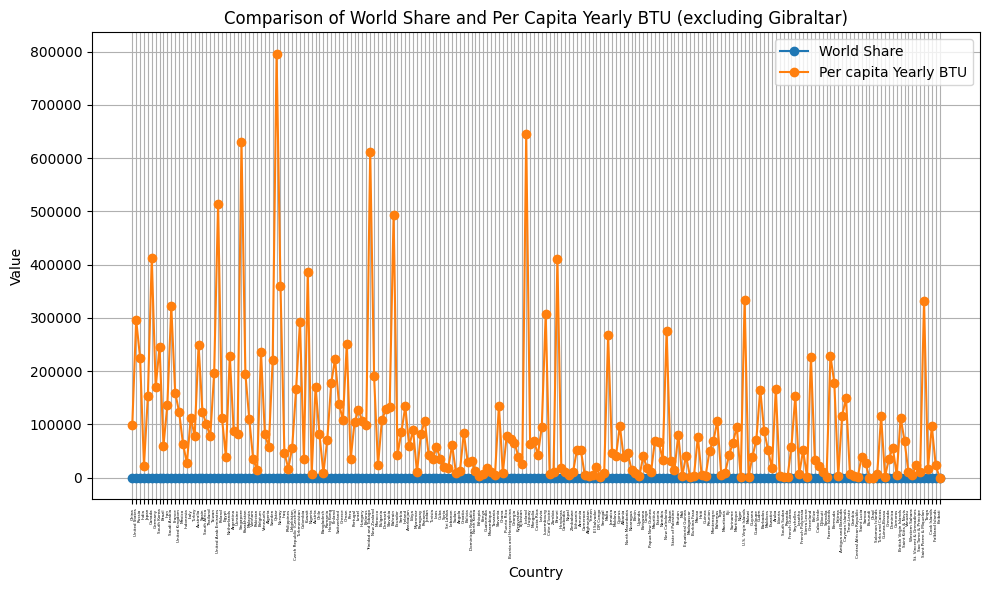

In [144]:
# Solution 4 - plot without Gibraltar
df = df[df['Country'] != 'Gibraltar']

plt.figure(figsize=(10, 6))

plt.plot(df['Country'], df['World Share'], marker='o', label='World Share')
plt.plot(df['Country'], df['Per capita Yearly BTU'], marker='o', label='Per capita Yearly BTU')

plt.title('Comparison of World Share and Per Capita Yearly BTU (excluding Gibraltar)')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=90, fontsize = 3)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">

<b>!! INFO !!</b> END of Abgabe Teil 3.

</div>